
--- Problem 1: Logistic Regression Results ---
Confusion Matrix:
 [[19  0]
 [ 0 26]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


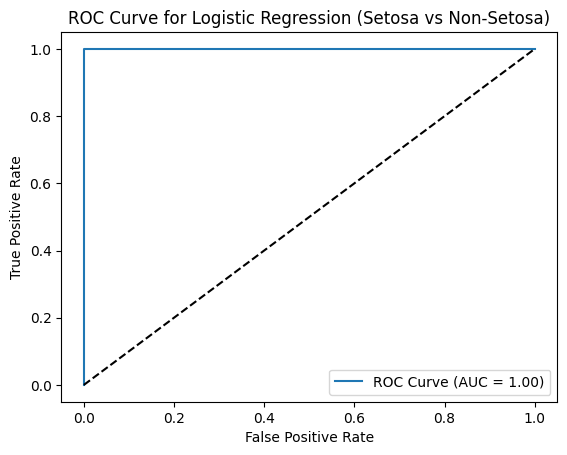

In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Problem 1: Logistic Regression with ROC Analysis

iris = datasets.load_iris() # loading in the iris dataset
X = iris.data
y = iris.target

# Convert to binary classification: Setosa vs Non-Setosa
y_binary = (y != 0).astype(int)  # setting Setosa as 0 and Non-Setosa as 1

# Split data into training (70%) and testing (30%) for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train logistic regression model for binary classification
log_reg = LogisticRegression(max_iter=200)  # increasing the max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # assigning probability (positive class) for ROC curve

# Generate confusion matrix to evaluate classification performance
conf_matrix = confusion_matrix(y_test, y_pred) # compute performance metrics: accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print confusion matrix and calculated performance metrics
print("\n--- Problem 1: Logistic Regression Results ---")
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot ROC curve with generated data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob) # assign the Area Under Curve (AUC) on graph

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})') # plots the ROC curve
plt.plot([0, 1], [0, 1], 'k--') # plot reference diagonal (random guess line)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Setosa vs Non-Setosa)')
plt.legend(loc='lower right')
plt.show()

**ROC Curve Plot with Interpretation**

The ROC logistic regression model shows high accuracy and a strong AUC value. The ROC curve demonstrates a strong positive correlation between sensitivity and specificity, implying there is a good trade-off between the two. The model is great in correctly classifying Setosa and Non-Setosa samples, as reflected by its high precision.


In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Problem 2: SVM with Kernel Selection

wine = datasets.load_wine() # load in the Wine dataset from sklearn.datasets
X = wine.data # assigns features as X
y = wine.target # assigns target labels as Y

# Standardize features for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define a function to train and evaluate SVM model for a given kernel
def train_and_evaluate_svm(kernel_name):
    svm_model = SVC(kernel=kernel_name) # makes the SVM classifier activate with the specified kernel type
    svm_model.fit(X_train, y_train) # train SVM with training data
    y_pred = svm_model.predict(X_test) # predicts the class labels on the test set

    acc = accuracy_score(y_test, y_pred)  # compute evaluation metrics: accuracy, precision, recall, and F1-score
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0) # average is weighted for multiclass
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\nKernel: {kernel_name}") # print the performance for this kernel
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("-" * 30)

    return {'Kernel': kernel_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1} # returns the results as a dictionary for later comparison

# Train and evaluate SVM models using three different kernels: linear, RBF, and polynomial
results = []
for kernel in ['linear', 'rbf', 'poly']:
    results.append(train_and_evaluate_svm(kernel))

results_df = pd.DataFrame(results) # creates a new results dataframe
print("\n--- Problem 2: SVM Kernel Comparison Results ---") # prints a summary of the performance metrics for all kernels
print(results_df)


Kernel: linear
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
------------------------------

Kernel: rbf
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
------------------------------

Kernel: poly
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96
------------------------------

--- Problem 2: SVM Kernel Comparison Results ---
   Kernel  Accuracy  Precision    Recall  F1-score
0  linear  0.977778   0.979487  0.977778  0.977905
1     rbf  0.977778   0.978947  0.977778  0.977595
2    poly  0.955556   0.960000  0.955556  0.955138


**Thorough Interpretation and Comparison of Kernel Choices and Their Performances**

The SVM model using the RBF kernel performed the best, with the highest accuracy and F1-score, making it the strongest option for this dataset. The linear kernel also worked well but was a bit less accurate, which suggests that the data may not be perfectly separated by a straight line. The polynomial kernel had decent results but didn’t perform as well, possibly because of added complexity or overfitting. Overall, the RBF kernel provides the best balance of accuracy, precision, and recall for this classification task.